### reaproveitando dados

In [5]:
alunos = ['Ana', 'Jefesson', 'Lucas', 'Paulo', 'Talita', 'Meggy']
disciplinas = ['series', 'dataframe', 'plotagem', 'machine learning']

In [68]:
from numpy.random import randint # Gera numeros inteiros aleatoria

# adicionando notas de 0 a 10 aleatorio aos alunos de acordo com as disciplinas
# Criei um dicionario com os nomes dos alunos e suas disciplinas com notas
alunos_com_notas = {}

for aluno in alunos:
    alunos_com_notas[aluno] = []
    
    for disciplina in disciplinas:
        alunos_com_notas[aluno].append(randint(0,10))


In [69]:
# CRIAR DATAFRAME E UM ARQUIVO CSV
import pandas as pd


df_alunos = pd.DataFrame(alunos_com_notas, index=disciplinas)
df_alunos.to_csv('alunos.csv') #, sep=';'
df_alunos

,Ana,Jefesson,Lucas,Paulo,Talita,Meggy
series,6,1,8,9,9,0
dataframe,1,4,0,6,1,5
plotagem,3,0,2,4,7,5
machine learning,3,9,8,2,5,4


In [70]:
# LER O ARQUIVO CSV

df = pd.read_csv('alunos.csv')
type(df)

pandas.core.frame.DataFrame

In [71]:
# criando series

#s_ana = pd.Series(df['Ana'])
s_ana = df['Ana']
type(s_ana)

pandas.core.series.Series

In [134]:
# vendo alguns atributos
# s_ana.name = 'notas da ana' # definir outro nome para a serie
s_ana.name

#Altera o valor do indice da serie
s_ana.index = ['series', 'dataframe', 'plotagem', 'machine learning'] 
s_ana.index

Index(['series', 'dataframe', 'plotagem', 'machine learning'], dtype='object')

<AxesSubplot: >

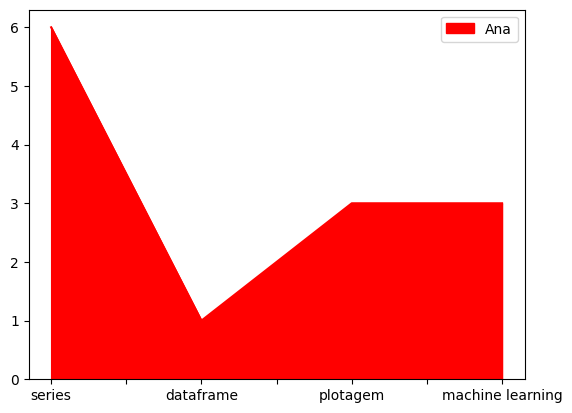

In [73]:
# plotagem
# s_ana.plot() plotagem rapida
#s_ana.plot.bar() #grafico em barra
s_ana.plot.area(legend='Ana', color='red')

In [96]:
# verificar informacoes(dados)

valor2 = 3 in s_ana.values
valor2

# ler os dados
for item in s_ana:
    pass
    #print(item)
    
for item in s_ana.iteritems(): #pega (chave,valor) como tupla. s_ana.items()
    if item[1] < 2:
        s_ana[item[0]] = 5

('series', 6)
('dataframe', 5)
('plotagem', 3)
('machine learning', 3)


In [98]:
s_ana

series              6
dataframe           5
plotagem            3
machine learning    3
Name: Ana, dtype: int64

In [116]:
# buscando dados
s_ana[0:2]
x = s_ana[[0,2]]
x = s_ana[['series','plotagem']]

# iloc e loc
x = s_ana.iloc[0:2]
x = s_ana.iloc[[0,2]]
x = s_ana.loc['series':'plotagem']
x = s_ana.loc[['series','plotagem']]

type(x)
x

series      6
plotagem    3
Name: Ana, dtype: int64

<AxesSubplot: >

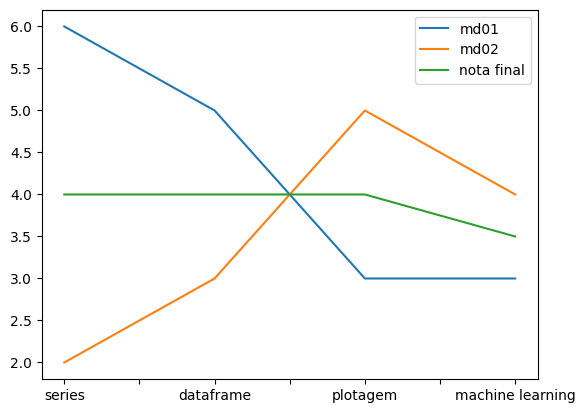

In [128]:
# operacoes com series
disciplinas = ['series', 'dataframe', 'plotagem', 'machine learning']
s_notas_ana_md_02 = pd.Series([2,3,5,4], index=disciplinas, name='notas modulo 02')

#modulo01 = [6,5,3,3]
#modulo02 = [2,3,5,4]

#nota final = md01 + md02 /2

#soma simples
s_ana_mais_2 = s_ana + 2

# notas + novas_notas
s_notas_finais = (s_ana + s_notas_ana_md_02) / 2

s_ana.name = 'md01'
s_notas_finais.name = 'nota final'
s_notas_ana_md_02.name = 'md02'

s_ana.plot(legend='md01')
s_notas_ana_md_02.plot(legend='md02')
s_notas_finais.plot(legend='nota final')

In [148]:
# verificar informacoes estatisticas

# Linhas afetadas NaN
s_ana.shape[0]

#informacoes gerais
#s_ana.info()

#Resumo estatistico
s_ana.describe()

# Contagem de registro com valores
s_ana.count()

# mostra a media
s_ana.mean()

# menor valor
s_ana.min()

# maior valor
s_ana.max()


6

In [236]:
df1 = pd.read_csv('alunos1.csv')
s_lucas = df1['Lucas']
s_lucas.index = disciplinas
s_lucas

series              NaN
dataframe             0
plotagem            sem
machine learning      8
Name: Lucas, dtype: object

In [237]:
# mostra numero de linhas afetadas
from pandas import isnull, notnull
import numpy as np


s_lucas.shape[0]
# mostra numero de linhas com valores
s_lucas.count()

# Verificar quantos valores nulos
x = s_lucas.shape[0] - s_lucas.count()
x

#fazer operacoes em valores nulos
val_null = 0
for item in s_lucas.items():
    if isnull(item[1]):
        val_null += 1
        print(f'A {item[0]} nao tem valor')
        #s_lucas[item[0]] = 0
    if notnull(item[1]):
        print(f'A {item[0]} tem valor')
        
val_null
s_lucas


A series nao tem valor
A dataframe tem valor
A plotagem tem valor
A machine learning tem valor


series              NaN
dataframe             0
plotagem            sem
machine learning      8
Name: Lucas, dtype: object

In [258]:
# Modificar valores nulos por outro
s_lucas = s_lucas.fillna(5)
# arranca a linha com valor nulo
#s_lucas.dropna()

type(s_lucas['dataframe'])
#s_lucas['dataframe'] = int(s_lucas['dataframe'])
s_lucas

series              5
dataframe           0
plotagem            0
machine learning    8
Name: Lucas, dtype: int64

In [260]:

for item in s_lucas.items(): 
    if type(item[1]) != int: 
        if item[1].isdigit():
            s_lucas[item[0]] = int(item[1]) 
        else:
            s_lucas[item[0]] = 0
        #print(type(item[1]))

# type(s_lucas[1])
# int(s_lucas[1])
# type(int(s_lucas[1]))
s_lucas

series              5
dataframe           0
plotagem            0
machine learning    8
Name: Lucas, dtype: int64

In [267]:

media = s_lucas.mean()
s_lucas['media'] = media
s_lucas

series              5.00
dataframe           0.00
plotagem            0.00
machine learning    8.00
media               3.25
Name: Lucas, dtype: float64

In [259]:
# analise de variavel string
x = 'sem'
if x.isdigit():
    print('e digito!')
else:
    print('nao e digito!')


nao e digito!
